# Chess Openings Analytics

Taking all the games from lichess database


In [2]:
import pandas as pd
import glob

In [52]:

# Replace this with your actual path
# path = 'data/*.csv'  
path = 'lichess_db_standard_rated_2016-03/games/*.csv'

# Use glob to get all the CSV file names in the specified path
csv_files = glob.glob(path)
print(csv_files)

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through each file and read it into a DataFrame
for filename in csv_files:
    df = pd.read_csv(filename)  # Read the CSV file
    dataframes.append(df)  # Append the DataFrame to the list

# Concatenate all DataFrames into a single DataFrame
all_games = pd.concat(dataframes, ignore_index=True)

['lichess_db_standard_rated_2016-03/games\\games_0-99999.csv', 'lichess_db_standard_rated_2016-03/games\\games_100000-199999.csv', 'lichess_db_standard_rated_2016-03/games\\games_1000000-1099999.csv', 'lichess_db_standard_rated_2016-03/games\\games_1100000-1199999.csv', 'lichess_db_standard_rated_2016-03/games\\games_1200000-1299999.csv', 'lichess_db_standard_rated_2016-03/games\\games_1300000-1399999.csv', 'lichess_db_standard_rated_2016-03/games\\games_1400000-1499999.csv', 'lichess_db_standard_rated_2016-03/games\\games_1500000-1599999.csv', 'lichess_db_standard_rated_2016-03/games\\games_1600000-1699999.csv', 'lichess_db_standard_rated_2016-03/games\\games_1700000-1799999.csv', 'lichess_db_standard_rated_2016-03/games\\games_1800000-1899999.csv', 'lichess_db_standard_rated_2016-03/games\\games_1900000-1999999.csv', 'lichess_db_standard_rated_2016-03/games\\games_200000-299999.csv', 'lichess_db_standard_rated_2016-03/games\\games_2000000-2099999.csv', 'lichess_db_standard_rated_2016

Inspecting the data

In [53]:
print(all_games.head())  # View the first few rows
all_games.info()  # Overview of column types and non-null counts
all_games.describe()  # Summary statistics


                                               Event  \
0  Rated Blitz tournament https://lichess.org/tou...   
1                                   Rated Blitz game   
2  Rated Bullet tournament https://lichess.org/to...   
3  Rated Blitz tournament https://lichess.org/tou...   
4  Rated Classical tournament https://lichess.org...   

                           Site              White           Black Result  \
0  https://lichess.org/BX9cNQC4  cacho_mascachotta    Urbi-Et-Orbi    0-1   
1  https://lichess.org/PwE2cWn3        Mescalero25          fialho    1-0   
2  https://lichess.org/sI2AWiHX         theosis101      sebafreire    1-0   
3  https://lichess.org/qAS73D1T          BrettDale  Viriskensoshir    0-1   
4  https://lichess.org/GbvwpLxO              borgs       IntiTupac    0-1   

   WhiteElo  BlackElo WhiteRatingDiff BlackRatingDiff  ECO  \
0      1563      1409             -17             +20    ?   
1      2044      2124             +17             -13  C00   
2      1677   

,WhiteElo,BlackElo
count,5.801175e+06,5.801175e+06
mean,1.736396e+03,1.734673e+03
std,2.764165e+02,2.777737e+02
min,7.340000e+02,7.450000e+02
25%,1.546000e+03,1.543000e+03
50%,1.734000e+03,1.732000e+03
75%,1.921000e+03,1.920000e+03
max,3.103000e+03,3.103000e+03


Check for missing values

In [58]:
all_games.isnull().sum()

Event              0
Site               0
White              0
Black              0
Result             0
WhiteElo           0
BlackElo           0
WhiteRatingDiff    0
BlackRatingDiff    0
ECO                0
Opening            0
TimeControl        0
Termination        0
dtype: int64

Distribution of Elo Ratings

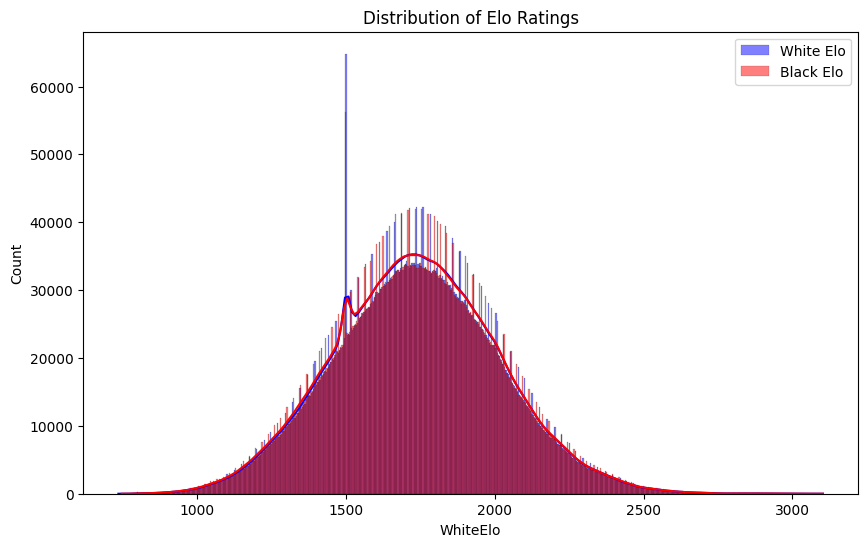

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(all_games['WhiteElo'], color='blue', label='White Elo', kde=True)
sns.histplot(all_games['BlackElo'], color='red', label='Black Elo', kde=True)
plt.legend()
plt.title('Distribution of Elo Ratings')
plt.show()


Opening Analysis
Analyze which openings are more frequent and how they relate to outcomes.

Opening
Van't Kruijs Opening                             123946
Scandinavian Defense: Mieses-Kotroc Variation    108984
Modern Defense                                   107968
Horwitz Defense                                   90261
Sicilian Defense                                  81495
Scandinavian Defense                              78369
French Defense: Knight Variation                  76671
Caro-Kann Defense                                 72367
Sicilian Defense: Bowdler Attack                  67245
Owen Defense                                      65053
Name: count, dtype: int64


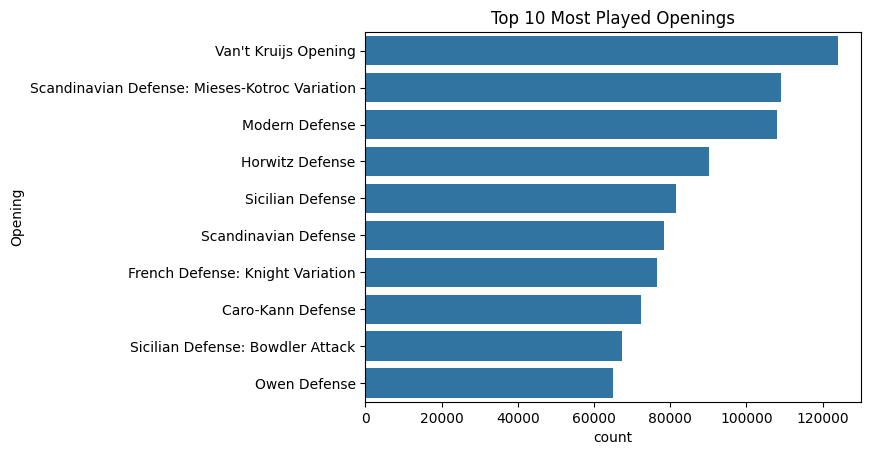

In [60]:
opening_counts = all_games['Opening'].value_counts()
print(opening_counts.head(10))  # Top 10 most frequent openings

sns.countplot(y='Opening', data=all_games, order=opening_counts.index[:10])
plt.title('Top 10 Most Played Openings')
plt.show()


Specific openings perform with different Elo levels

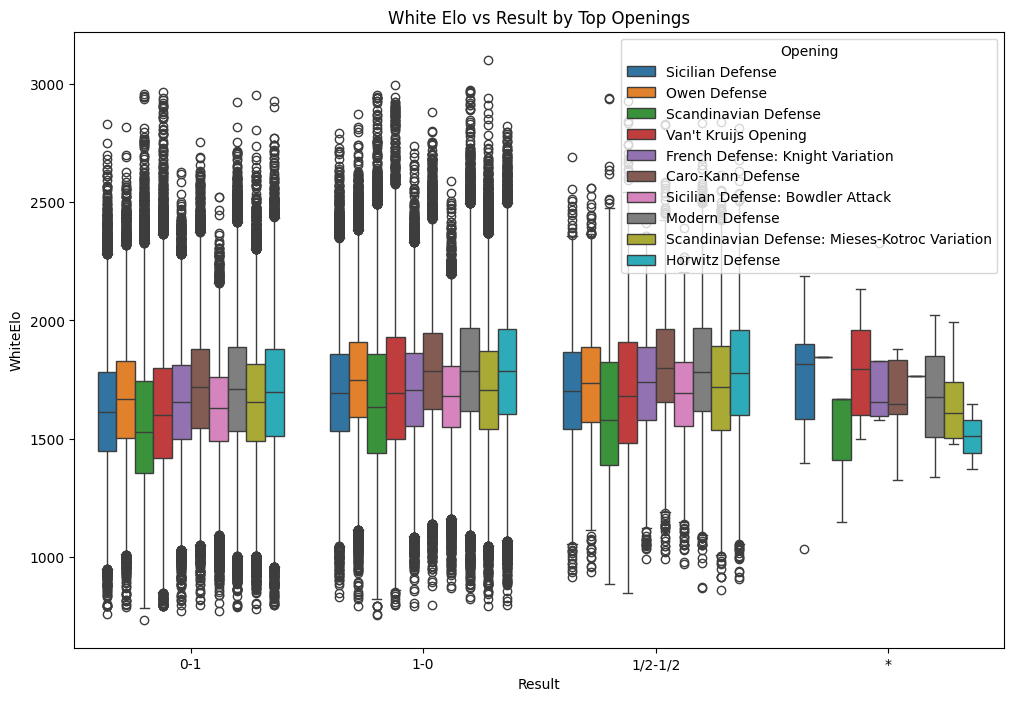

In [61]:
top_openings = all_games['Opening'].value_counts().nlargest(10).index
filtered_data = all_games[all_games['Opening'].isin(top_openings)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Result', y='WhiteElo', data=filtered_data, hue='Opening')
plt.title('White Elo vs Result by Top Openings')
plt.show()


outcome analysis

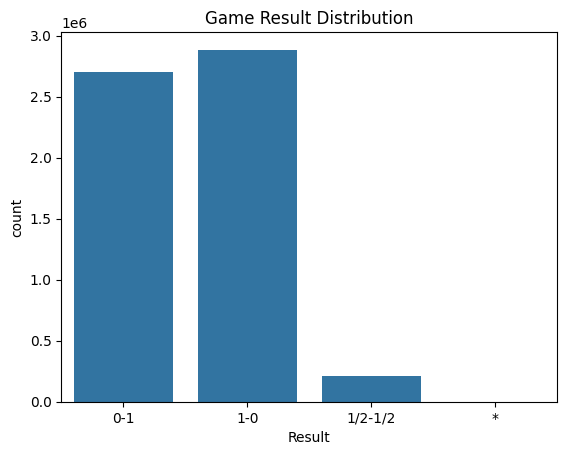

In [63]:
result_counts = all_games['Result'].value_counts()
sns.countplot(x='Result', data=all_games)
plt.title('Game Result Distribution')
plt.show()


Compare the Elo difference between White and Black for different results:

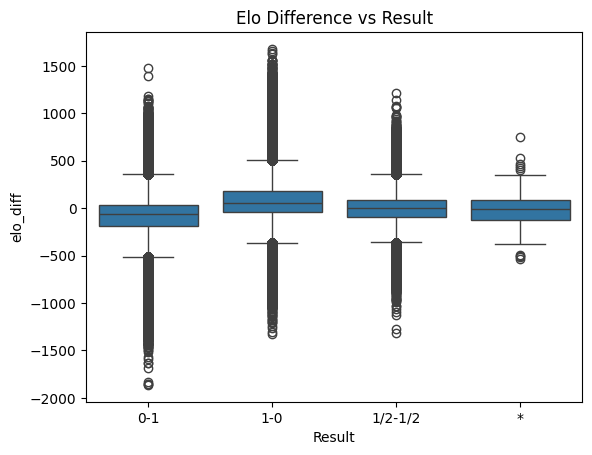

In [64]:
all_games['elo_diff'] = all_games['WhiteElo'] - all_games['BlackElo']

sns.boxplot(x='Result', y='elo_diff', data=all_games)
plt.title('Elo Difference vs Result')
plt.show()

Correlation Analysis

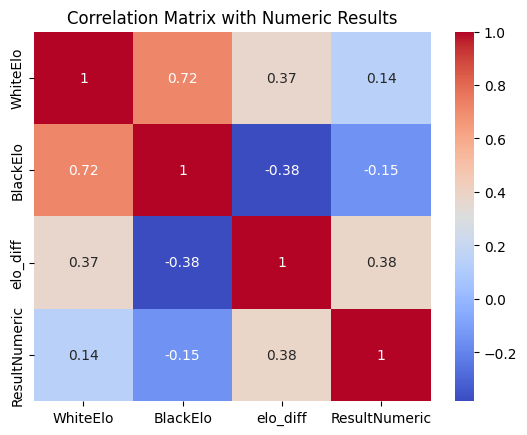

In [65]:
# Create a new numeric column for results
def encode_result(result):
    if result == '1-0':
        return 1  # White wins
    elif result == '0-1':
        return 0  # Black wins
    else:
        return 0.5  # Draw

# Apply the function to create a new column
all_games['ResultNumeric'] = all_games['Result'].apply(encode_result)

# Now calculate the correlation matrix including the new numeric result column
corr_matrix = all_games[['WhiteElo', 'BlackElo', 'elo_diff', 'ResultNumeric']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Numeric Results')
plt.show()

all_games.drop(['ResultNumeric'], axis=1, inplace=True)



Elo Distribution

 Win Rate Analysis

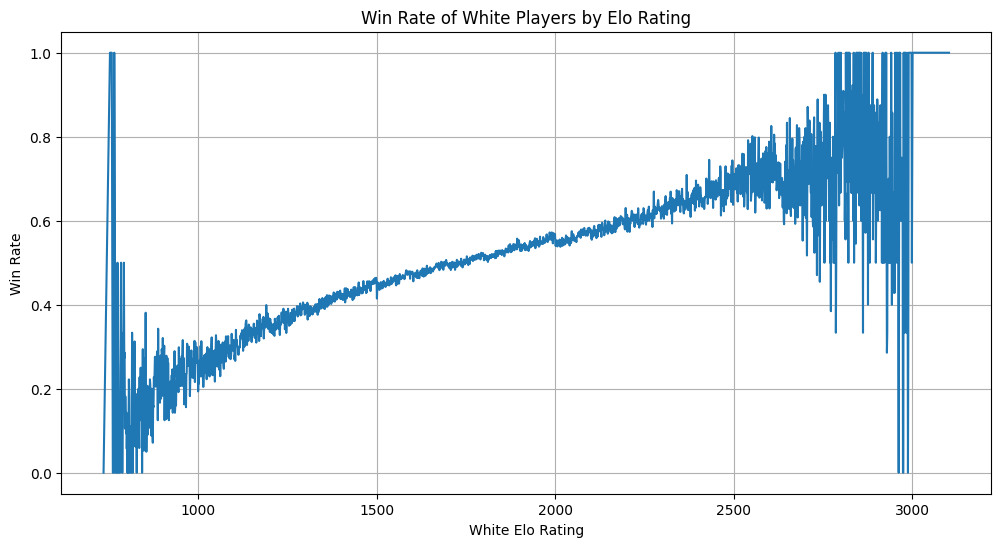

In [66]:
win_rates = all_games.groupby('WhiteElo')['Result'].apply(lambda x: (x == '1-0').mean())
plt.figure(figsize=(12, 6))
win_rates.plot()
plt.title('Win Rate of White Players by Elo Rating')
plt.xlabel('White Elo Rating')
plt.ylabel('Win Rate')
plt.grid()
plt.show()


Opening Performance Analysis

## Feature Engineering


In [67]:
all_games.columns

# lets take only the classical games for this analysis 
# Display all unique values in the Event column
unique_events = all_games['Event'].unique()
unique_termination = all_games['Termination'].unique()
print(unique_events)
print(unique_termination)



['Rated Blitz tournament https://lichess.org/tournament/XLiNy5KR'
 'Rated Blitz game'
 'Rated Bullet tournament https://lichess.org/tournament/swlsEYuM' ...
 'Rated Bullet tournament https://lichess.org/tournament/BXYcg0GG'
 'Rated Blitz tournament https://lichess.org/tournament/KAAykwdN'
 'Rated Bullet tournament https://lichess.org/tournament/WnhID9rM']
['Normal' 'Time forfeit' 'Abandoned' 'Rules infraction' 'Unterminated']


In [68]:
# from that we  only need classical 
# Filter for classical games (assuming 'Classical' is part of the Event name)
classical_games = all_games[all_games['Event'].str.contains('Classical', case=False)]

# Remove games where Termination is 'Abandoned' or 'Rules infraction'
rated_classical_games = classical_games[~classical_games['Termination'].isin(['Abandoned', 'Rules infraction'])]

# Verify the result by printing the first few rows
print(rated_classical_games.head())


                                                Event  \
4   Rated Classical tournament https://lichess.org...   
10                               Rated Classical game   
12  Rated Classical tournament https://lichess.org...   
13                               Rated Classical game   
14  Rated Classical tournament https://lichess.org...   

                            Site         White          Black Result  \
4   https://lichess.org/GbvwpLxO         borgs      IntiTupac    0-1   
10  https://lichess.org/yvnA3VUA        tacaia        marossi    0-1   
12  https://lichess.org/55wUvBYG  FernandoWolf          Shir0    1-0   
13  https://lichess.org/OnHyLf9F  bahrameshghi        cordoba    1-0   
14  https://lichess.org/CfPynoUd  BESERKING123  Ricardo-Lopes    1-0   

    WhiteElo  BlackElo WhiteRatingDiff BlackRatingDiff  ECO  \
4       1726      1702             -12             +14  A13   
10      1274      1360              -8              +9  A41   
12      1641      1533             

Taking Only the serious games

475419


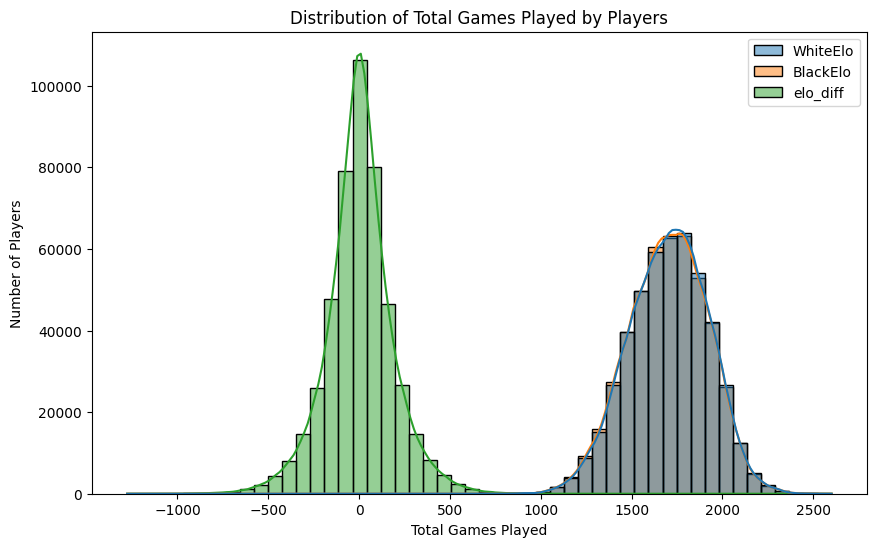

In [73]:
# Count the number of games for each player (both White and Black)
white_game_counts = rated_classical_games['White'].value_counts()
black_game_counts = rated_classical_games['Black'].value_counts()

# Combine the counts to get total games played by each player
total_game_counts = white_game_counts.add(black_game_counts, fill_value=0)

# Calculate the 90th percentile of total games played
cutoff_value = total_game_counts.quantile(0.9) # 118

# Filter for games where both players have played more than the cutoff
serious_games = rated_classical_games[(
    rated_classical_games['White'].isin(total_game_counts[total_game_counts > cutoff_value].index) &
    rated_classical_games['Black'].isin(total_game_counts[total_game_counts > cutoff_value].index)
)]

# Print the number of serious games
print(len(serious_games))

# Plot the distribution of total game counts
plt.figure(figsize=(10, 6))
sns.histplot(serious_games, bins=50, kde=True)
plt.title('Distribution of Total Games Played by Players')
plt.xlabel('Total Games Played')
plt.ylabel('Number of Players')
plt.show()


In [74]:
# Print the cutoff value and inspect serious games
print(f"90th percentile cutoff for total games: {cutoff_value}")
print(serious_games.head())

# If needed, adjust to a different percentile
cutoff_value_95 = total_game_counts.quantile(0.95)
print(f"95th percentile cutoff: {cutoff_value_95}")


90th percentile cutoff for total games: 118.0
                                                Event  \
4   Rated Classical tournament https://lichess.org...   
10                               Rated Classical game   
12  Rated Classical tournament https://lichess.org...   
27  Rated Classical tournament https://lichess.org...   
39                               Rated Classical game   

                            Site         White      Black Result  WhiteElo  \
4   https://lichess.org/GbvwpLxO         borgs  IntiTupac    0-1      1726   
10  https://lichess.org/yvnA3VUA        tacaia    marossi    0-1      1274   
12  https://lichess.org/55wUvBYG  FernandoWolf      Shir0    1-0      1641   
27  https://lichess.org/4BhapBM7         CZERW   FFF_Nico    0-1      1437   
39  https://lichess.org/aee9yMYW   hatzopoulos  monaco712    0-1      1509   

    BlackElo WhiteRatingDiff BlackRatingDiff  ECO  \
4       1702             -12             +14  A13   
10      1360              -8        

In [75]:
# drop all the columns except white elo black elo  opening and result

filtered_games = serious_games[['WhiteElo', 'BlackElo', 'Opening', 'Result']]

# write to csv

filtered_games.to_csv('data/serious_games.csv', index=False)



## Random Forest Classifier Training and Testing

In [1]:
import joblib
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
serious_games = pd.read_csv('data/serious_games.csv')

le_opening = LabelEncoder()

serious_games['Opening'] = le_opening.fit_transform(serious_games['Opening'])

encoded = pd.get_dummies(serious_games[[ 'WhiteElo', 'BlackElo', 'Result', 'Opening' ]], columns = ['Result'])

In [ ]:
encoded

In [4]:
opening_encodings = dict(zip(le_opening.classes_, le_opening.transform(le_opening.classes_)))

In [ ]:
opening_encodings

In [6]:
X = encoded[[ 'WhiteElo', 'BlackElo', 'Opening' ]]
y = encoded.drop([ 'WhiteElo', 'BlackElo', 'Opening' ], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
rf_Model = RandomForestClassifier(n_jobs=12)

In [ ]:
rf_Model.fit(X_train, y_train)

In [9]:
# # load
# rf_Model = joblib.load("data/serious_games.joblib")

In [ ]:
print(rf_Model.score(X_train, y_train))
print(rf_Model.score(X_test, y_test))

In [ ]:
white_elo = 1500
black_elo = 1600
opening_encoded = 0


input_data = [[white_elo, black_elo, opening_encoded]]

# Predict probabilities for the input
probabilities = rf_Model.predict_proba(input_data)

# Convert to percentages
percentages = [ prob[0][1] * 100 for prob in probabilities ]

# Assuming you have three possible results: 0 (black win), 1 (white win), 2 (draw)
results = [ 'Black Wins', 'White Wins', 'Draw' ]

# Print the result with percentages
for result, percentage in zip(results, percentages):
    print(f"{result}: {percentage:.2f}%")

In [ ]:
rf_Model.predict([[1825, 2325, 113]])

In [ ]:
rf_Model.predict([[2000, 2000, 0]])

In [ ]:
# # save
# joblib.dump(rf_Model, "data/serious_games.joblib")